# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [3]:
dataset = pd.read_csv('drag_coef.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
y = y.reshape(len(y),1)

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Applying Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

c:\Users\91897\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

##Applying Grid Seach

In [8]:
from sklearn.model_selection import GridSearchCV
grid_param = { 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf','linear']}
model = SVR()
grid_search = GridSearchCV(estimator=model,
                           param_grid=grid_param,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)
# Create the GridSearchCV object
grid_search = GridSearchCV(model, grid_param, refit=True, verbose=2, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train.ravel())
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Model:", best_model)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

##Predicting the Test set Results

In [9]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
y_pred_train = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_train)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4.56e+00  1.49e+00]
 [ 3.50e+01  2.20e+01]
 [ 3.35e+01  1.17e+01]
 [ 3.26e+01  6.23e+01]
 [ 9.62e+00  1.26e+00]
 [ 3.32e+01  1.92e+01]
 [ 3.51e+01  8.22e+01]
 [ 4.55e+01  2.24e+02]
 [-2.16e+01  1.00e+00]
 [ 5.35e+01  5.26e+01]
 [ 3.79e+01  2.96e+02]
 [ 3.43e+01  6.92e+01]
 [ 1.95e+01  1.45e+00]
 [ 3.70e+01  1.07e+02]
 [ 5.70e+01  7.48e+01]
 [ 3.25e+01  5.42e+00]
 [ 3.24e+01  1.36e+01]
 [-2.33e+01  1.03e+00]
 [ 2.89e+01  3.84e+00]
 [ 3.36e+01  2.69e+02]
 [-7.24e+00  8.61e-01]
 [ 3.51e+01  6.20e+00]
 [ 3.26e+01  1.16e+02]
 [ 3.25e+01  5.61e+00]
 [ 3.47e+01  1.26e+01]
 [ 3.48e+01  1.44e+02]
 [ 3.24e+01  4.95e+00]
 [ 2.84e+01  1.84e+00]
 [ 1.72e+01  1.29e+00]
 [ 3.01e+01  2.06e+00]
 [ 1.56e+01  8.64e-01]
 [-7.47e+00  1.17e+00]
 [ 3.89e+01  7.14e+00]
 [ 5.37e+01  2.57e+00]
 [ 3.66e+01  1.12e+01]
 [ 3.76e+01  3.72e+01]
 [ 3.19e+01  2.56e+00]
 [ 3.97e+01  7.10e+01]
 [ 2.70e+01  3.12e+00]
 [ 3.39e+01  2.55e+01]
 [ 3.31e+01  5.73e+00]
 [ 3.74e+01  3.76e+01]
 [-1.39e+01  1.18e+00]
 [ 3.76e+01

## Evaluating the Model Performance and Regression plot

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
print('R_2 Score :', r2_score(y_test, y_pred))
print('Mean Squared Error :', mean_squared_error(y_test, y_pred))
print('MSE for Training set:', mean_squared_error(y_train, y_pred_train))
print('R_2 score for Training set:',r2_score(y_train, y_pred_train))

R_2 Score : -0.009176582416843715
Mean Squared Error : 27904.923505420662
MSE for Training set: 1383.1164454472457
R_2 score for Training set: -1382.1164454472457


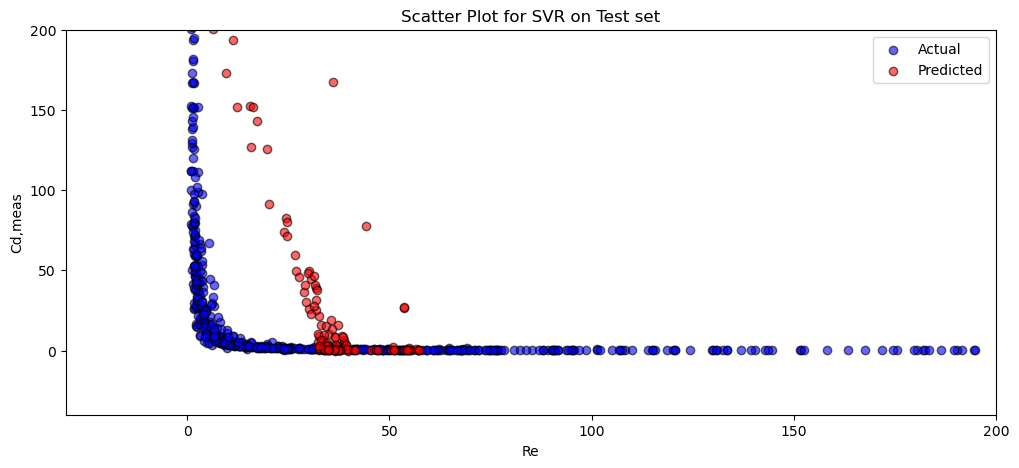

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.scatter( y ,X[:,-1], c = 'blue'  ,edgecolors='black', alpha=0.6, label = 'Actual')
plt.scatter( y_pred ,X_test[:,-1], c = 'red' , edgecolors='black', alpha=0.6,label = 'Predicted')
##plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.ylim(-40, 200)
plt.xlim(-30, 200)
plt.title('Scatter Plot for SVR on Test set')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

In [12]:
print('R_2 Score :', r2_score(y_pred, X_test[:,-1]))

R_2 Score : -1734.8272064753535


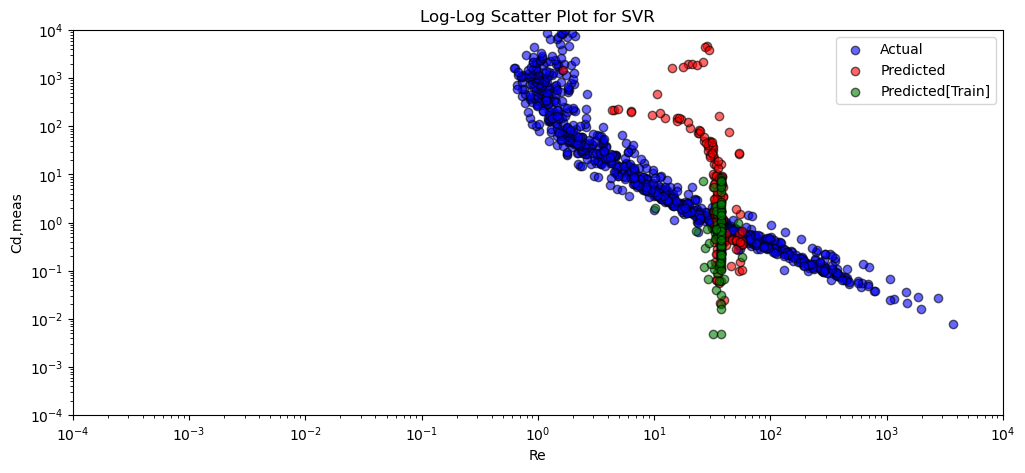

In [13]:
plt.figure(figsize=(12, 5))

plt.scatter(y, X[:, -1], c='blue',edgecolors='black', alpha=0.6, label='Actual')
plt.scatter(y_pred, X_test[:, -1], c='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.scatter( y_pred_train ,X_train[:,-1], c = 'green' ,edgecolors='black', alpha=0.6, label = 'Predicted[Train]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001,10000)
plt.ylim(0.0001,10000)
plt.title('Log-Log Scatter Plot for SVR')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()
plt.show()

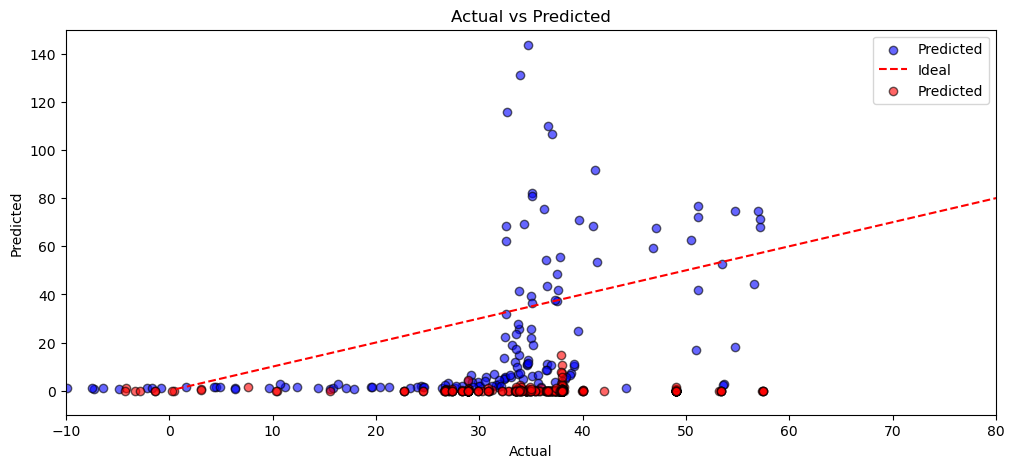

In [14]:
plt.figure(figsize=(12,5))
plt.scatter(y_pred,y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train,y_train, color='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(-10, 80)
plt.ylim(-10, 150)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

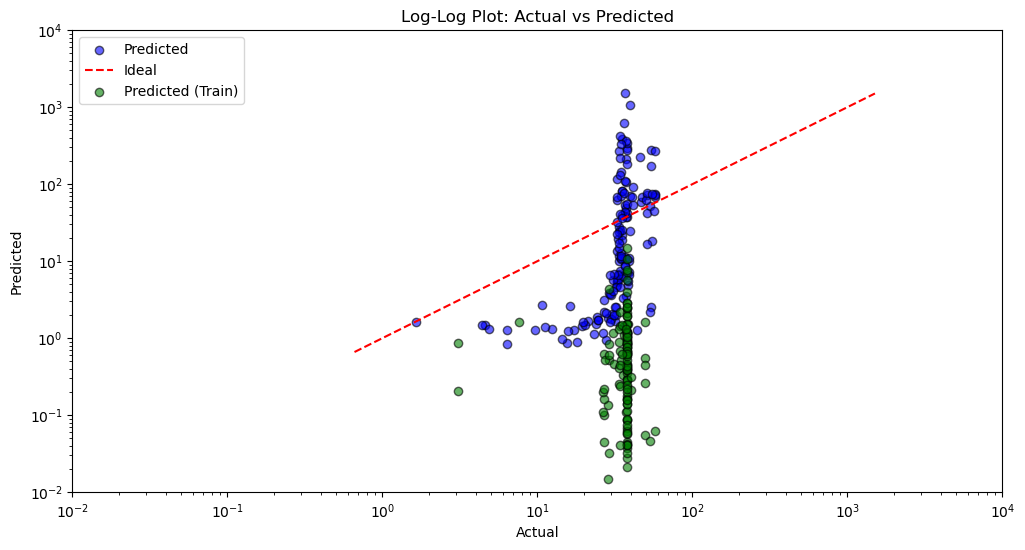

In [15]:
plt.figure(figsize=(12, 6))

plt.scatter(y_pred, y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train, y_train, color='green',edgecolors='black', alpha=0.6, label='Predicted (Train)')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.ylim(0.01,10000)
plt.xlim(0.01,10000)

plt.title('Log-Log Plot: Actual vs Predicted')
plt.legend()

plt.show()

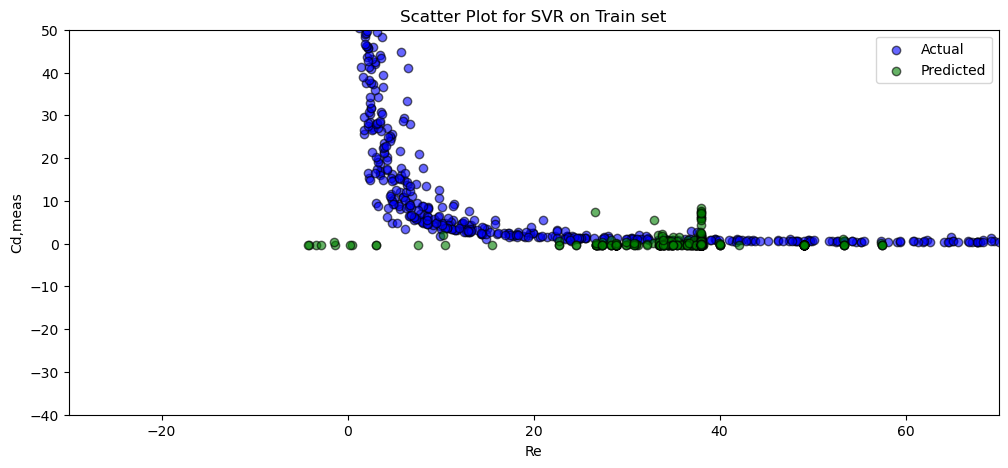

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.scatter( y ,X[:,-1], c = 'blue'  ,edgecolors='black', alpha=0.6, label = 'Actual')
plt.scatter( y_pred_train ,X_train[:,-1], c = 'green' ,edgecolors='black', alpha=0.6, label = 'Predicted')
##plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.ylim(-40, 50)
plt.xlim(-30, 70)
plt.title('Scatter Plot for SVR on Train set')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

##Scatter Plot for Training set

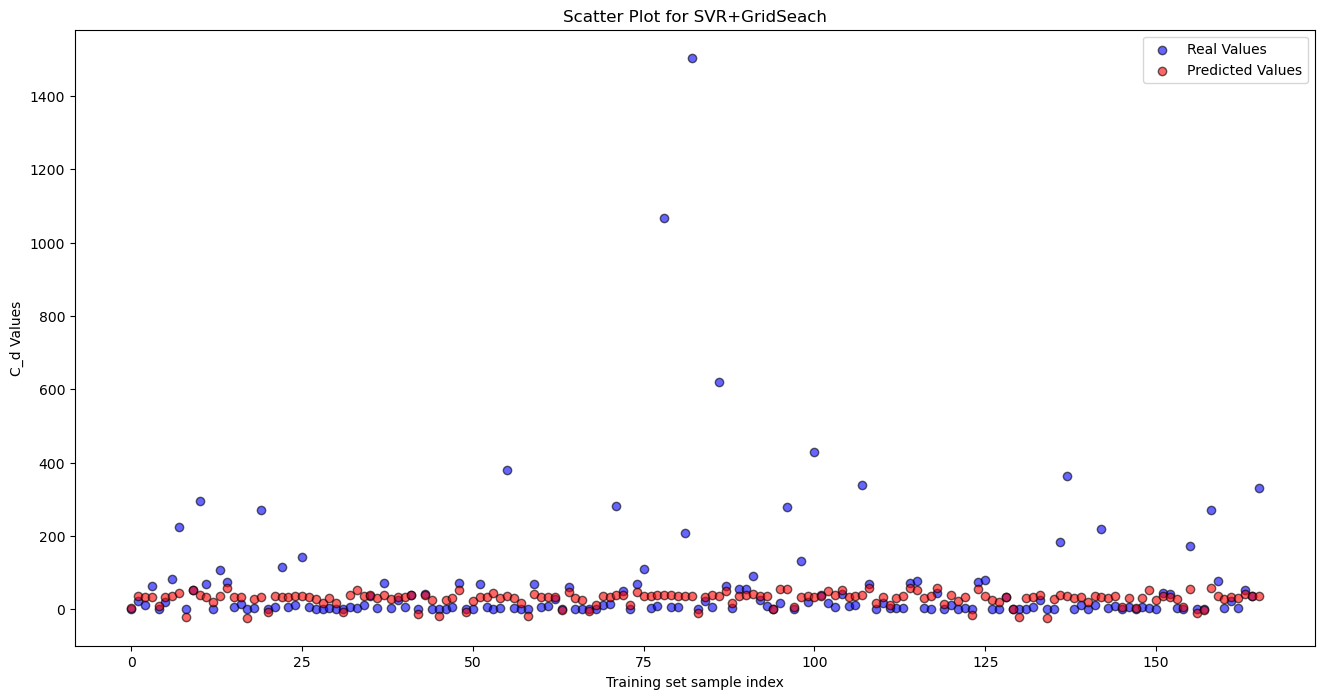

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_test)), y_test, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred)), y_pred , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter Plot for SVR+GridSeach')
plt.xlabel('Training set sample index')
plt.ylabel('C_d Values')
plt.legend()
plt.show()

##Scatter plot for Test Set

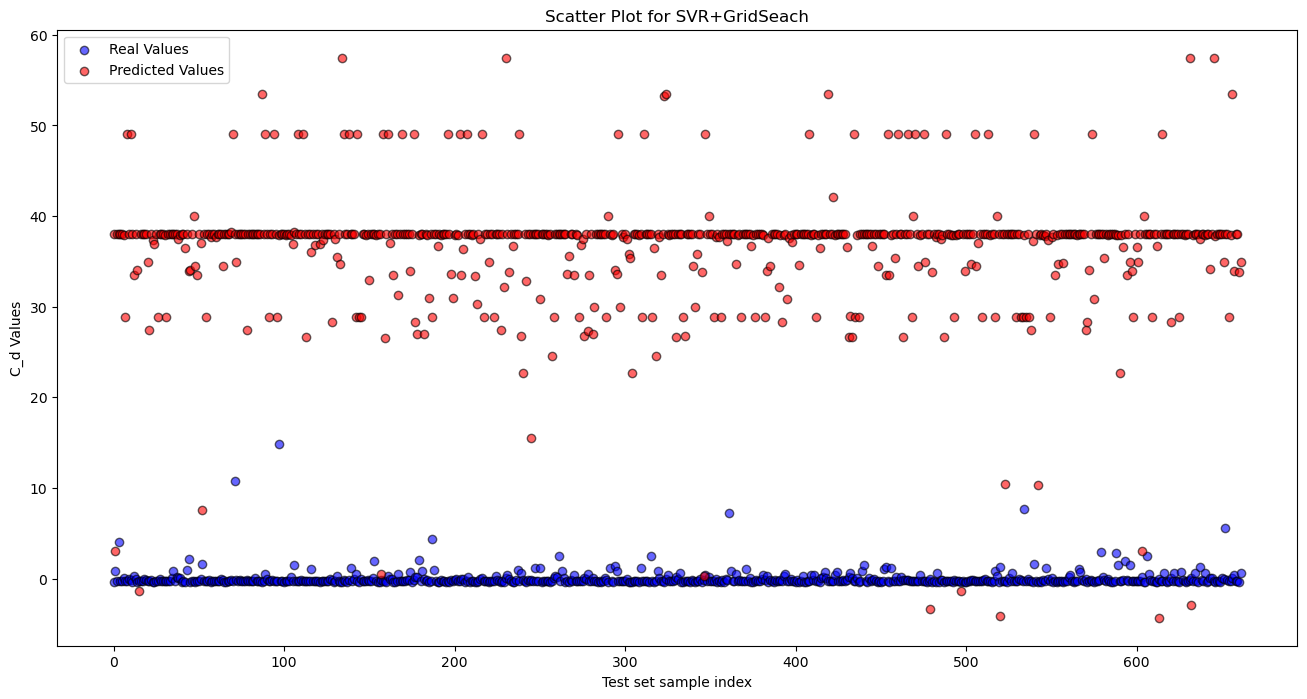

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_train)), y_train, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred_train)), y_pred_train , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter Plot for SVR+GridSeach')
plt.xlabel('Test set sample index')
plt.ylabel('C_d Values')
plt.legend()
plt.show()